# Importing Libraries

In [634]:
# import Labraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from sqlalchemy import create_engine
import mysql.connector
import logging
import time
logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

# Loading The Dataset

In [636]:
# Connection with database
con = mysql.connector.connect(host='localhost', user='root', password='add your password')
print("Connection successful")
con.close()    

Connection successful


In [637]:
engine = create_engine('mysql+pymysql://root:add your password@localhost:3306/PakAirTransport')

query = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'PakAirTransport'
"""

tables = pd.read_sql(query, con=engine)
print(tables)


             TABLE_NAME
0  airline traffic flow
1  airport traffic flow


In [638]:
con = engine
airline = pd.read_sql('SELECT * FROM `airline traffic flow`',con)
airport = pd.read_sql('SELECT * FROM `airport traffic flow`',con)

In [639]:
for table in tables['TABLE_NAME']:
    print('-'*50,f"{table}",'-'*50)
    query = f"SELECT COUNT(*) AS count FROM `{table}`"
    count_df = pd.read_sql(query, con=engine)                                        
    print("Count of records:",count_df['count'].values[0])
    display(pd.read_sql(f"SELECT * FROM `{table}` LIMIT 5",con ))

-------------------------------------------------- airline traffic flow --------------------------------------------------
Count of records: 575


,YEAR,SECTION,AIRLINE_CODE,AIRLINE_NAME,SERVICES_DEP,SERVICES_ARR,PASSENGER_EMBARKED,PASSENGER_DISEMBARKED,PASSENGER_TERMINAL,PASSENGER_TRANSIT,...,CARGO_LOADED,CARGO_UNLOADED,CARGO_TERMINAL,CARGO_TRANSIT,CARGO_TOTAL,MAIL_LOADED,MAIL_UNLOADED,MAIL_TERMINAL,MAIL_TRANSIT,MAIL_TOTAL
0,2006-2007,Domestic,ABQ,AIR BLUE,5974.0,5974.0,701786.0,701786.0,1403572.0,0.0,...,7487.0,7487.0,14975.0,0.0,14975.0,0.0,0.0,0.0,0.0,0.0
1,2006-2007,Domestic,PIA,PAKISTAN INT',27460.0,27460.0,1991829.0,1991829.0,3983658.0,113739.0,...,31586.0,31586.0,63172.0,0.0,63172.0,500.0,500.0,1001.0,0.0,1001.0
2,2006-2007,Domestic,RSO,AERO ASIA,1068.0,1068.0,104590.0,104590.0,209180.0,0.0,...,2035.0,2035.0,4069.0,0.0,4069.0,0.0,0.0,0.0,0.0,0.0
3,2006-2007,Domestic,SAI,SHAHEEN AIR,2035.0,2035.0,178149.0,178149.0,356298.0,0.0,...,1297.0,1297.0,2593.0,0.0,2593.0,1121.0,1121.0,2242.0,0.0,2242.0
4,2006-2007,International,ABQ,AIR BLUE,1095.0,1099.0,146603.0,105008.0,251611.0,0.0,...,1853.0,591.0,2443.0,0.0,2443.0,0.0,0.0,0.0,0.0,0.0


-------------------------------------------------- airport traffic flow --------------------------------------------------
Count of records: 605


,Column1,AIRPORT,AIRCRAFT_COMM_DOM,AIRCRAFT_COMM_INTL,AIRCRAFT_COMM_TOTAL,AIRCRAFT_NONCOMM,AIRCRAFT_GRAND TOTAL,PASSENGER_Domestic,PASSENGER_International,PASSENGER_total,CARGO_Domestic,CARGO_International,CARGO_Total,MAIL_Domestic,MAIL_International,MAIL_TOTAL
0,2006-2007,BAHAWALPUR,634,0,634,1075,1709,21697,0,21697,10,0,10,0,0,0
1,2006-2007,BANNU,0,0,0,16,16,0,0,0,0,0,0,0,0,0
2,2006-2007,DADU,106,0,106,0,106,3327,0,3327,0,0,0,0,0,0
3,2006-2007,CHITRAL,672,0,672,228,900,25791,0,25791,86,0,86,28,0,28
4,2006-2007,D.G KHAN,566,0,566,54,620,29974,0,29974,32,0,32,0,0,0


## Data Overview

In [641]:
airline.columns

Index(['YEAR', 'SECTION', 'AIRLINE_CODE', 'AIRLINE_NAME', 'SERVICES_DEP',
       'SERVICES_ARR', 'PASSENGER_EMBARKED', 'PASSENGER_DISEMBARKED',
       'PASSENGER_TERMINAL', 'PASSENGER_TRANSIT', 'PASSENGER_TOTAL',
       'CARGO_LOADED', 'CARGO_UNLOADED', 'CARGO_TERMINAL', 'CARGO_TRANSIT',
       'CARGO_TOTAL', 'MAIL_LOADED', 'MAIL_UNLOADED', 'MAIL_TERMINAL',
       'MAIL_TRANSIT', 'MAIL_TOTAL'],
      dtype='object')

In [642]:
# Create comprehensive data profile
def data_overview(df):
    print(f"=== {df} DATASET OVERVIEW ===")
    print(f"Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print(f"Duplicate Rows: {df.duplicated().sum()}")
    print(f"Date Range: {df['YEAR'].min()} - {df['YEAR'].max()}")
    print(f"Unique Airlines: {df['AIRLINE_NAME'].nunique()}")
    return df.info()

In [643]:
# Airline Data
data_overview(airline)

===           YEAR        SECTION AIRLINE_CODE     AIRLINE_NAME  SERVICES_DEP  \
0    2006-2007       Domestic          ABQ         AIR BLUE        5974.0   
1    2006-2007       Domestic          PIA    PAKISTAN INT'       27460.0   
2    2006-2007       Domestic          RSO        AERO ASIA        1068.0   
3    2006-2007       Domestic          SAI      SHAHEEN AIR        2035.0   
4    2006-2007  International          ABQ         AIR BLUE        1095.0   
..         ...            ...          ...              ...           ...   
570  2023-2024  International          THY          TURKISH        1071.0   
571  2023-2024  International          UAE         EMIRATES        2787.0   
572  2023-2024  International          UZB       UZBEKISTAN           2.0   
573  2023-2024  International          VIR  VIRGIN ATLANTIC           4.0   
574  2023-2024  International          VSV    SCAT AIRLINES          39.0   

     SERVICES_ARR  PASSENGER_EMBARKED  PASSENGER_DISEMBARKED  \
0      

In [644]:
# Airport data
def data_overview(df):
    print(f"=== {df} DATASET OVERVIEW ===")
    print(f"Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print(f"Duplicate Rows: {df.duplicated().sum()}")
    print(f"Date Range: {df['Column1'].min()} - {df['Column1'].max()}")
    print(f"Unique Airlines: {df['AIRPORT'].nunique()}")
    return df.info()

In [645]:
data_overview(airport)

===        Column1         AIRPORT  AIRCRAFT_COMM_DOM  AIRCRAFT_COMM_INTL  \
0    2006-2007      BAHAWALPUR                634                   0   
1    2006-2007           BANNU                  0                   0   
2    2006-2007            DADU                106                   0   
3    2006-2007         CHITRAL                672                   0   
4    2006-2007        D.G KHAN                566                   0   
..         ...             ...                ...                 ...   
600  2023-2024  SEHWAN SHARIF                   0                   0   
601  2023-2024          TURBAT                262                  84   
602  2023-2024          QUETTA               2255                 933   
603  2023-2024      NAWABSHAH                   0                   0   
604  2023-2024       ISLAMKOT                   1                  96   

     AIRCRAFT_COMM_TOTAL  AIRCRAFT_NONCOMM  AIRCRAFT_GRAND TOTAL  \
0                    634              1075         

# Exploratory Data Analysis and Data Cleaning

In [647]:
for col in airline.describe(include = 'object').columns:
    print(col)
    print(airline[col].unique())
    print('-'*50)

YEAR
['2006-2007' '2007-2008' '2008-2009' '2009-2010' '2010-2011' '2011-2012'
 '2012-2013' '2013-2014' '2014-2015' '2015-2016' '2016-2017' '2017-2018'
 '2018-2019' '2019-2020' '2020-2021' '2021-2022' '2022-2023' '2023-2024']
--------------------------------------------------
SECTION
['Domestic' 'International']
--------------------------------------------------
AIRLINE_CODE
['ABQ' 'PIA' 'RSO' 'SAI' 'ABY' 'AFG' 'RCE' 'ALK' 'BAW' 'BBC' 'CCA' 'CLX'
 'CPA' 'CSN' 'DHX' 'ETD' 'GFA' 'IRA' 'KAC' 'MAS' 'QTR' 'RPK' 'SIA' 'SVA'
 'SYR' 'THA' 'THY' 'UAE' 'UZB' 'IRM' 'OMA' 'FDB' 'KNE' 'RKM' 'MPK' 'SFW'
 'TBM' 'MXD' 'SEP' 'AHY' 'KIS' 'KMF' 'MLR' 'OMS' 'TBN' 'IAW' 'JZR' 'SGQ'
 'SIF' 'PGT' 'VIR' 'ADY' 'FBA' 'SAW' 'FJL' 'ETH' 'ANK' 'SMR' 'VSV']
--------------------------------------------------
AIRLINE_NAME
['AIR BLUE' "PAKISTAN INT'" 'AERO ASIA' 'SHAHEEN AIR' 'AIR ARABIA'
 'ARIANA AFGHAN' 'C/O' 'SRILANKAN' 'BRITISH' 'BIMAN' 'AIR CHINA'
 'CARGOLUX' 'CATHAY PACIFIC' 'CHINA' 'DHL AVIATION' 'ETIHAD AIRWAYS

In [648]:
for col in airport.describe(include='object'):
    print(col)
    print(airport[col].unique())
    print('-'*50)

Column1
['2006-2007' '2007-2008' '2008-2009' '2009-2010' '2010-2011' '2011-2012'
 '2012-2013' '2013-2014' '2014-2015' '2015-2016' '2016-2017' '2017-2018'
 '2018-2019' '2019-2020' '2020-2021' '2021-2022' '2022-2023' '2023-2024']
--------------------------------------------------
AIRPORT
['BAHAWALPUR' 'BANNU' 'DADU' 'CHITRAL' 'D.G KHAN' 'D.I.KHAN' 'DALBANDIN'
 'FAISALABAD' 'GILGIT' 'GWADAR' 'ISLAMABAD' 'JACOBABAD' 'KADANWARI'
 'KARACHI JIAP' 'LAHORE AIIAP' 'MOHENJODARO' 'MULTAN' 'MUZAFFARABA'
 'NAWABSHAH' 'PANJGUR' 'PASNI' 'PESHAWAR' 'QUETTA' 'RAHIM YAR'
 'RAWALPINDI' 'SAIDU SHARIF' 'SAWAN' 'SEHWAN' 'SKARDU' 'SUI' 'SUKKUR'
 'TURBAT' 'WALTON' 'ZHOB' 'HYDERABAD' 'KHUZDAR' 'SIALKOT' 'ZAMZAMA OIL'
 'BHIT AIRSTRIP' 'KADANWARI AIRSTRIP' 'SKARDU ' 'PANJGUR ' 'ZHOB '
 'R.Y. KHAN ' 'SEHWAN SHARIF ' 'WALTON ' 'NAWABSHAH ' 'ZAMZAMA AIRSTRIP'
 'BADIN AIRSTRIP' 'ORMARA ' 'FAISAL AIR BASE KARACHI' 'ISLAMKOT '
 'MIANWALI ' 'PAF RISALPUR' 'SAIDU SHARIF ' 'JUZZAK AIRSTRIP'
 'MUZAFFARABAD ' 'PARACHINAR ' 

In [649]:
airport.isnull().sum()

Column1                    0
AIRPORT                    0
AIRCRAFT_COMM_DOM          0
AIRCRAFT_COMM_INTL         0
AIRCRAFT_COMM_TOTAL        0
AIRCRAFT_NONCOMM           0
AIRCRAFT_GRAND TOTAL       0
PASSENGER_Domestic         0
PASSENGER_International    0
PASSENGER_total            0
CARGO_Domestic             0
CARGO_International        0
CARGO_Total                0
MAIL_Domestic              0
MAIL_International         0
MAIL_TOTAL                 0
dtype: int64

In [650]:
airline.isnull().sum()

YEAR                     0
SECTION                  0
AIRLINE_CODE             0
AIRLINE_NAME             0
SERVICES_DEP             1
SERVICES_ARR             1
PASSENGER_EMBARKED       1
PASSENGER_DISEMBARKED    1
PASSENGER_TERMINAL       1
PASSENGER_TRANSIT        1
PASSENGER_TOTAL          1
CARGO_LOADED             1
CARGO_UNLOADED           1
CARGO_TERMINAL           1
CARGO_TRANSIT            1
CARGO_TOTAL              1
MAIL_LOADED              1
MAIL_UNLOADED            1
MAIL_TERMINAL            1
MAIL_TRANSIT             1
MAIL_TOTAL               1
dtype: int64

In [651]:
airline.dropna(inplace=True)

In [652]:
airline.isnull().sum()

YEAR                     0
SECTION                  0
AIRLINE_CODE             0
AIRLINE_NAME             0
SERVICES_DEP             0
SERVICES_ARR             0
PASSENGER_EMBARKED       0
PASSENGER_DISEMBARKED    0
PASSENGER_TERMINAL       0
PASSENGER_TRANSIT        0
PASSENGER_TOTAL          0
CARGO_LOADED             0
CARGO_UNLOADED           0
CARGO_TERMINAL           0
CARGO_TRANSIT            0
CARGO_TOTAL              0
MAIL_LOADED              0
MAIL_UNLOADED            0
MAIL_TERMINAL            0
MAIL_TRANSIT             0
MAIL_TOTAL               0
dtype: int64

In [653]:
airline.describe()

,SERVICES_DEP,SERVICES_ARR,PASSENGER_EMBARKED,PASSENGER_DISEMBARKED,PASSENGER_TERMINAL,PASSENGER_TRANSIT,PASSENGER_TOTAL,CARGO_LOADED,CARGO_UNLOADED,CARGO_TERMINAL,CARGO_TRANSIT,CARGO_TOTAL,MAIL_LOADED,MAIL_UNLOADED,MAIL_TERMINAL,MAIL_TRANSIT,MAIL_TOTAL
count,574.000000,574.000000,5.740000e+02,5.740000e+02,5.740000e+02,574.000000,5.740000e+02,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,2023.986063,2019.226481,2.778203e+05,2.681688e+05,5.459891e+05,5182.844948,5.511719e+05,6377.398955,2809.216028,9186.618467,12.891986,9199.510453,47.512195,169.487805,217.033101,0.508711,217.541812
std,4598.138067,4592.707216,4.615120e+05,4.541145e+05,9.149210e+05,24046.131604,9.303373e+05,10785.762951,6037.609833,15602.737544,87.838374,15610.240598,186.062504,1246.144403,1345.930981,4.924465,1345.995452
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.750000,143.500000,1.141250e+04,1.135325e+04,2.304200e+04,0.000000,2.342225e+04,177.250000,8.250000,275.250000,0.000000,275.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,488.500000,488.500000,5.710950e+04,5.277100e+04,1.088390e+05,0.000000,1.088390e+05,2007.500000,296.000000,2756.000000,0.000000,2756.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2130.250000,2130.250000,3.499935e+05,3.242198e+05,6.810680e+05,0.000000,6.810680e+05,6880.500000,2574.250000,10195.000000,0.000000,10195.000000,1.000000,40.750000,62.000000,0.000000,62.000000
max,38445.000000,38445.000000,2.740770e+06,2.740770e+06,5.481540e+06,232786.000000,5.590448e+06,62511.000000,65463.000000,81988.000000,881.000000,81988.000000,2429.000000,19835.000000,22265.000000,96.000000,22265.000000


In [654]:
airport.describe()

,AIRCRAFT_COMM_DOM,AIRCRAFT_COMM_INTL,AIRCRAFT_COMM_TOTAL,AIRCRAFT_NONCOMM,AIRCRAFT_GRAND TOTAL,PASSENGER_Domestic,PASSENGER_International,PASSENGER_total,CARGO_Domestic,CARGO_International,CARGO_Total,MAIL_Domestic,MAIL_International,MAIL_TOTAL
count,605.000000,605.000000,605.000000,605.000000,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,1857.381818,2012.383471,3869.466116,1446.380165,5315.553719,1.896214e+05,3.333089e+05,5.229207e+05,1547.861157,7189.624793,8728.099174,40.892562,165.485950,206.366942
std,4569.857882,5217.442892,9543.927654,4431.459297,11684.798447,5.335233e+05,9.019097e+05,1.396496e+06,5328.067843,22793.062860,27685.701112,213.999048,1395.976146,1433.470474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,8.000000,76.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280.000000,0.000000,314.000000,54.000000,520.000000,8.907000e+03,0.000000e+00,9.217000e+03,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,1008.000000,233.000000,1476.000000,382.000000,2694.000000,5.244700e+04,1.471000e+04,9.359200e+04,55.000000,4.000000,86.000000,0.000000,0.000000,1.000000
max,26968.000000,26913.000000,51890.000000,43402.000000,59249.000000,3.074521e+06,4.717182e+06,7.267026e+06,41703.000000,123427.000000,161762.000000,1751.000000,23844.000000,23909.000000


# Data Analysis and Visualizations

In [656]:
#Count total passengers per airport to find Pakistan's top airports
top_airports = (airport.groupby('AIRPORT')['PASSENGER_total']
               .sum()
               .sort_values(ascending=False)
               .reset_index())
top_airports.columns = ['Airport','Total_Passenger']
top_airports['Rank'] = range(1,len(top_airports) + 1)
top_10 = top_airports.head(10)

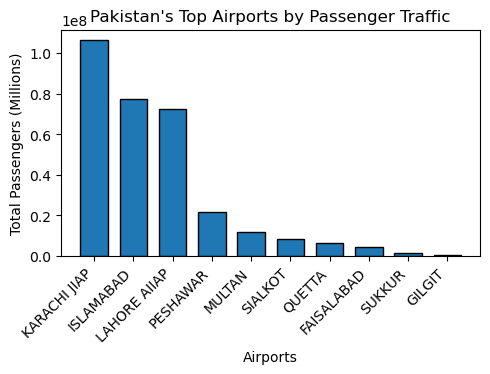

In [657]:
plt.figure(figsize=(5,4))  # Wider figure for airport names
plt.title("Pakistan's Top Airports by Passenger Traffic")
plt.bar(top_10['Airport'], top_10['Total_Passenger'], edgecolor='k', width=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate airport names
plt.ylabel('Total Passengers (Millions)')
plt.xlabel('Airports')
plt.tight_layout()  # Prevents label cutoff
plt.show()

**Most of Pakistan's air travel happens through only 3 major airports, meaning these airports might face capacity problems while many smaller cities could attract much more passengers if properly developed.**

In [659]:
#Compare domestic and international passenger numbers over years
domestic_intl_trend = airline.groupby(['YEAR', 'SECTION'])['PASSENGER_TOTAL'].sum().reset_index()
domestic_intl_trend
# Make it prettier
domestic_intl_pivot = domestic_intl_trend.pivot(index='YEAR', columns='SECTION', values='PASSENGER_TOTAL')
print(domestic_intl_pivot)

SECTION     Domestic  International
YEAR                               
2006-2007  6066447.0      6745609.0
2007-2008  6627527.0      7561111.0
2008-2009  6269975.0      7969757.0
2009-2010  6780583.0      8304699.0
2010-2011  7153242.0      8460198.0
2011-2012  6594965.0      9412272.0
2012-2013  6791277.0      9786123.0
2013-2014  7224941.0     10890897.0
2014-2015  6352758.0     11724202.0
2015-2016  8374744.0     12435634.0
2016-2017  7182009.0     15232808.0
2017-2018  7316947.0     15893111.0
2018-2019  6018711.0     15705913.0
2019-2020  4231612.0     11166440.0
2020-2021  5354273.0      5623216.0
2021-2022  6434299.0     10646813.0
2022-2023  5681749.0     15443011.0
2023-2024  5679830.0     17234994.0


**Pakistan has successfully built an international aviation hub but failed to develop its domestic market, representing a critical gap in aviation strategy and economic opportunity.**

In [661]:
#Compare passenger_embarked vs passenger_disembarked
airline['Embarked_DIS_Ratio'] = airline['PASSENGER_EMBARKED'] / (airline['PASSENGER_DISEMBARKED'] + 0.001)  # Add small number

print("Airlines/Airports with highest departure ratio")
top_departure_hub = airline.nlargest(10,'Embarked_DIS_Ratio')[['AIRLINE_NAME','PASSENGER_EMBARKED','PASSENGER_DISEMBARKED','Embarked_DIS_Ratio']]
top_departure_hub

Airlines/Airports with highest departure ratio


,AIRLINE_NAME,PASSENGER_EMBARKED,PASSENGER_DISEMBARKED,Embarked_DIS_Ratio
477,AIR SIAL,157.0,0.0,157000.000000
572,UZBEKISTAN,468.0,8.0,58.492688
408,THAI AIRWAYS,151733.0,7970.0,19.038015
493,ARIANA AFGHAN,118.0,26.0,4.538287
441,THAI AIRWAYS,116.0,29.0,3.999862
566,SOMON AIR,52.0,14.0,3.714020
283,AZERBAIJAN,121.0,36.0,3.361018
295,MIHIN LANKA,4624.0,1519.0,3.044106
418,AZERBAIJAN,347.0,127.0,2.732262
483,UZBEKISTAN,2360.0,886.0,2.663654


In [662]:
print("Airport with lowest departure ratio:")
lowest_departure_hubs = airline.nsmallest(10,'Embarked_DIS_Ratio')[['AIRLINE_NAME','PASSENGER_EMBARKED','PASSENGER_DISEMBARKED','Embarked_DIS_Ratio']]
lowest_departure_hubs

Airport with lowest departure ratio:


,AIRLINE_NAME,PASSENGER_EMBARKED,PASSENGER_DISEMBARKED,Embarked_DIS_Ratio
12,CARGOLUX,0.0,0.0,0.0
15,DHL AVIATION,0.0,0.0,0.0
23,ROYAL AIRLINES,0.0,0.0,0.0
42,CARGOLUX,0.0,0.0,0.0
45,DHL AVIATION,0.0,0.0,0.0
71,CARGOLUX,0.0,0.0,0.0
74,DHL AVIATION,0.0,0.0,0.0
98,CARGOLUX,0.0,0.0,0.0
101,DHL AVIATION,0.0,0.0,0.0
124,CARGOLUX,0.0,0.0,0.0



Hub Type Distribution:
Hub_Type
Balanced         294
Departure Hub    186
Arrival Hub       94
Name: count, dtype: int64


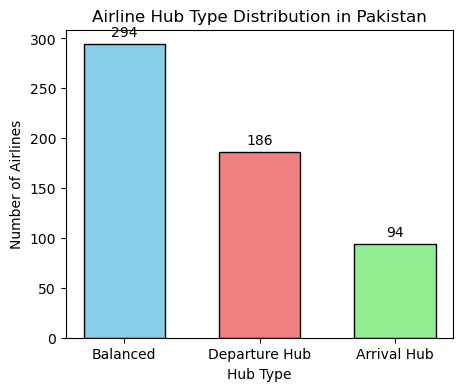

In [663]:
# Add interpretation categories
def categorize_ratio(ratio):
    if ratio > 1.1:
        return "Departure Hub"
    elif ratio < 0.9:
        return "Arrival Hub" 
    else:
        return "Balanced"

airline['Hub_Type'] = airline['Embarked_DIS_Ratio'].apply(categorize_ratio)
print("\nHub Type Distribution:")
print(airline['Hub_Type'].value_counts())

# Define hub_counts
hub_counts = airline['Hub_Type'].value_counts()
# make graph
plt.figure(figsize=(5, 4))
bars = plt.bar(hub_counts.index, hub_counts.values, 
               color=['skyblue', 'lightcoral', 'lightgreen'], 
               edgecolor='black', width=0.6)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Airline Hub Type Distribution in Pakistan')
plt.xlabel('Hub Type')
plt.ylabel('Number of Airlines')
plt.show()

**Pakistani airlines are doing well overall, but the country could attract many more foreign visitors by working with more airlines that focus on bringing people into Pakistan rather than just taking them out.**

In [665]:
# Complete growth tracking
growth_df = pd.DataFrame({
    'Total_Passengers': yearly_totals.values,
    'YoY_Growth_%': yearly_totals.pct_change() * 100,
    'Cumulative_Growth_%': ((yearly_totals / yearly_totals.iloc[0]) - 1) * 100
})

print("Complete Growth Analysis:")
print(growth_df)

Complete Growth Analysis:
           Total_Passengers  YoY_Growth_%  Cumulative_Growth_%
Column1                                                       
2006-2007          12812056           NaN             0.000000
2007-2008          14188638     10.744427            10.744427
2008-2009          14239732      0.360105            11.143223
2009-2010          15085282      5.937963            17.742867
2010-2011          15613440      3.501148            21.865218
2011-2012          16007237      2.522167            24.938862
2012-2013          16577400      3.561908            29.389069
2013-2014          18115838      9.280333            41.396806
2014-2015          18076960     -0.214608            41.093358
2015-2016          20810378     15.121005            62.428091
2016-2017          22414817      7.709802            74.950976
2017-2018          23209941      3.547314            81.157037
2018-2019          21724366     -6.400598            69.561903
2019-2020          15398052  

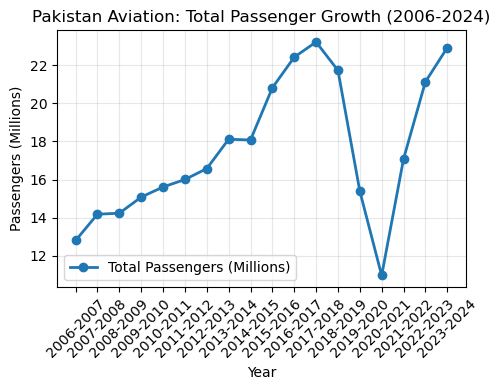

In [666]:
plt.figure(figsize=(5, 4))
plt.plot(growth_df.index, growth_df['Total_Passengers']/1000000, 
         marker='o', linewidth=2, label='Total Passengers (Millions)')
plt.title('Pakistan Aviation: Total Passenger Growth (2006-2024)')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Pakistan's aviation sector demonstrates remarkable resilience and growth potential, making it an attractive market for long-term investment despite short-term volatilities.**

In [668]:
#Which airlines carry the most passengers?
airline['passenger_total'] = airline['PASSENGER_EMBARKED'] + airline['PASSENGER_DISEMBARKED']

most_passenger = airline.groupby('AIRLINE_NAME')['passenger_total'].sum().sort_values(ascending=False)

print("Top 10 Airlines by Total Passengers:")
print("="*50)
for i, (airline_name, passengers) in enumerate(most_passenger.head(10).items(), 1):
    print(f"{i:2d}. {airline_name:<30}: {passengers:,} passengers")

Top 10 Airlines by Total Passengers:
 1. PAKISTAN INT'                 : 123,107,039.0 passengers
 2. AIR BLUE                      : 32,302,257.0 passengers
 3. EMIRATES                      : 27,967,338.0 passengers
 4. SHAHEEN AIR                   : 23,106,238.0 passengers
 5. SAUDI ARABIAN                 : 20,465,353.0 passengers
 6. QATAR AIRWAYS                 : 13,114,274.0 passengers
 7. SERENE AIR                    : 10,502,539.0 passengers
 8. ETIHAD AIRWAYS                : 8,423,519.0 passengers
 9. FLY DUBAI                     : 8,296,892.0 passengers
10. AIR ARABIA                    : 7,676,262.0 passengers


In [669]:
#.Calculate percentage of total market each airline has
airline_total = airline.groupby('AIRLINE_NAME')['passenger_total'].sum()
total_market = airline_total.sum()
market_share = (airline_total / total_market) * 100
market_share_df = pd.DataFrame({
    'Airline': market_share.index,
    'Total_passengers': airline_total.values,
    'market_share_%': market_share.values
}).sort_values('market_share_%',ascending=False)
print("Market Share by Airline:")
print("="*50)
print(market_share_df)

Market Share by Airline:
            Airline  Total_passengers  market_share_%
37    PAKISTAN INT'       123107039.0       39.281406
4          AIR BLUE        32302257.0       10.307112
17         EMIRATES        27967338.0        8.923912
48      SHAHEEN AIR        23106238.0        7.372816
44    SAUDI ARABIAN        20465353.0        6.530153
39    QATAR AIRWAYS        13114274.0        4.184546
47       SERENE AIR        10502539.0        3.351185
19   ETIHAD AIRWAYS         8423519.0        2.687805
21        FLY DUBAI         8296892.0        2.647400
2        AIR ARABIA         7676262.0        2.449367
24         GULF AIR         6291835.0        2.007620
55     THAI AIRWAYS         4662362.0        1.487682
56          TURKISH         4439795.0        1.416665
7          AIR SIAL         4401398.0        1.404413
36         OMAN AIR         3659627.0        1.167726
22       FLY JINNAH         2819466.0        0.899645
6         AIR INDUS         1368986.0        0.436821
51 

In [670]:
print("Top Airlines Market Share:")
print("="*60)
for i, row in market_share_df.head(10).iterrows():
    print(f"{row['Airline']:<25}: {row['Total_passengers']:>10,} passengers ({row['market_share_%']:>5.1f}%)")

print(f"\nTotal Market Share Check: {market_share_df['market_share_%'].sum():.1f}%")

Top Airlines Market Share:
PAKISTAN INT'            : 123,107,039.0 passengers ( 39.3%)
AIR BLUE                 : 32,302,257.0 passengers ( 10.3%)
EMIRATES                 : 27,967,338.0 passengers (  8.9%)
SHAHEEN AIR              : 23,106,238.0 passengers (  7.4%)
SAUDI ARABIAN            : 20,465,353.0 passengers (  6.5%)
QATAR AIRWAYS            : 13,114,274.0 passengers (  4.2%)
SERENE AIR               : 10,502,539.0 passengers (  3.4%)
ETIHAD AIRWAYS           : 8,423,519.0 passengers (  2.7%)
FLY DUBAI                : 8,296,892.0 passengers (  2.6%)
AIR ARABIA               : 7,676,262.0 passengers (  2.4%)

Total Market Share Check: 100.0%


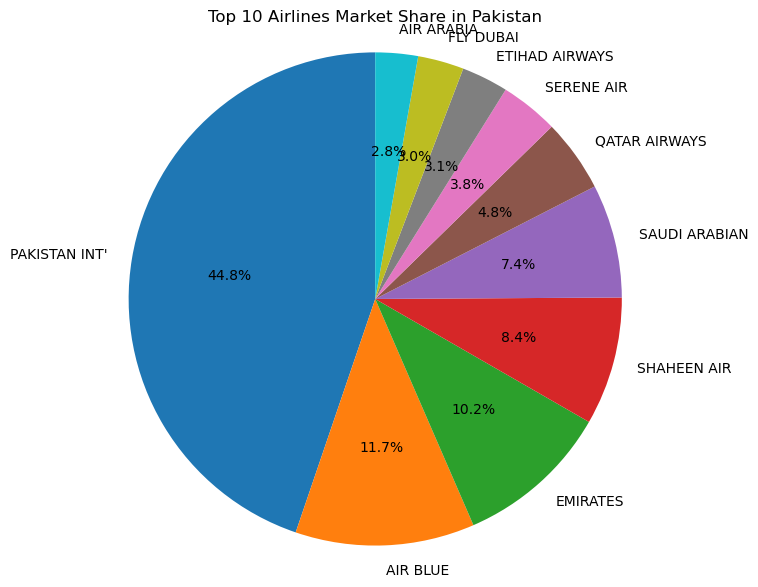

In [671]:
plt.figure(figsize=(7, 7))
top_airlines = market_share_df.head(10)

plt.pie(top_airlines['market_share_%'], 
        labels=top_airlines['Airline'], 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Top 10 Airlines Market Share in Pakistan')
plt.axis('equal')
plt.show()

In [672]:
#Do some airlines focus more on domestic vs international?
#Compare their domestic/international passenger ratios
airline_section = airline.groupby(['AIRLINE_NAME','SECTION'])['passenger_total'].sum()
pivot_table = airline_section.unstack(fill_value=0)
# calculate percentage
pivot_table['Total'] = pivot_table['Domestic'] + pivot_table['International']
pivot_table['Domestic_%'] = (pivot_table['Domestic'] / pivot_table['Total'] * 100).round(1)
pivot_table['International_%'] = (pivot_table['International'] / pivot_table['Total'] * 100).round(1)
print("Airline focus Analysis:")
print(pivot_table[['Domestic','International','Domestic_%','International_%']])

Airline focus Analysis:
SECTION            Domestic  International  Domestic_%  International_%
AIRLINE_NAME                                                           
AERO ASIA          209180.0       111041.0        65.3             34.7
AERO NOMAD              0.0        20963.0         0.0            100.0
AIR ARABIA              0.0      7676262.0         0.0            100.0
AIR ARABIA ABU          0.0       160864.0         0.0            100.0
AIR BLUE         17843082.0     14459175.0        55.2             44.8
AIR CHINA               0.0       646234.0         0.0            100.0
AIR INDUS         1368986.0            0.0       100.0              0.0
AIR SIAL          3841722.0       559676.0        87.3             12.7
ARIANA AFGHAN           0.0         3704.0         0.0            100.0
AZERBAIJAN              0.0        25552.0         0.0            100.0
BIMAN                   0.0       115319.0         0.0            100.0
BRITISH                 0.0       571326

In [673]:
# Find domestic-focused airlines
domestic_focused = pivot_table[pivot_table['Domestic_%'] > 60].sort_values('Domestic_%', ascending=False)
print(f"\nDomestic-Focused Airlines (>60% domestic):")
print(domestic_focused[['Domestic_%', 'International_%']])

# Find international-focused airlines  
intl_focused = pivot_table[pivot_table['International_%'] > 60].sort_values('International_%', ascending=False)
print(f"\nInternational-Focused Airlines (>60% international):")
print(intl_focused[['Domestic_%', 'International_%']])

# Balanced airlines
balanced = pivot_table[(pivot_table['Domestic_%'] >= 40) & (pivot_table['Domestic_%'] <= 60)]
print(f"\nBalanced Airlines (40-60% split):")
print(balanced[['Domestic_%', 'International_%']])


Domestic-Focused Airlines (>60% domestic):
SECTION       Domestic_%  International_%
AIRLINE_NAME                             
AIR INDUS          100.0              0.0
FLY JINNAH          95.7              4.3
AIR SIAL            87.3             12.7
SERENE AIR          83.2             16.8
AERO ASIA           65.3             34.7

International-Focused Airlines (>60% international):
SECTION          Domestic_%  International_%
AIRLINE_NAME                                
AERO NOMAD              0.0            100.0
AIR ARABIA              0.0            100.0
MALAYSIAN               0.0            100.0
MALINDO AIR             0.0            100.0
MIHIN LANKA             0.0            100.0
OMAN AIR                0.0            100.0
PEGASUS                 0.0            100.0
QATAR AIRWAYS           0.0            100.0
RAK AIRWAYS             0.0            100.0
SAFI AIRWAYS            0.0            100.0
SALAM AIR               0.0            100.0
SAUDI ARABIAN          

**Pakistan International Airlines (PIA): 55.9% domestic, 44.1% international - slightly domestic-focused
Air Blue: 55.2% domestic, 44.8% international - similar domestic preference
Shaheen Air: 50.9% domestic, 49.1% international - most balanced operation**
**These three airlines represent Pakistan's most resilient carriers, with diversified route portfolios that can weather both domestic economic challenges and international travel disruptions.**

In [675]:
#Use the cargo_passenger_ratio column
#Which airports handle more cargo relative to passengers?
cargo_airport = airport.groupby('AIRPORT')[['CARGO_Total','PASSENGER_total']].sum()
cargo_airport['cargo_passenger_ratio'] = cargo_airport['CARGO_Total'] / (cargo_airport['PASSENGER_total'] + 0.001)
cargo_focused = cargo_airport.sort_values('cargo_passenger_ratio',ascending=False)
print("Airports by cargo to passenger ratio:")
print("="*60)
print(cargo_focused.head(10))

Airports by cargo to passenger ratio:
              CARGO_Total  PASSENGER_total  cargo_passenger_ratio
AIRPORT                                                          
KARACHI JIAP      2288660        106344395               0.021521
LAHORE AIIAP      1542624         72633930               0.021238
ISLAMABAD         1121292         77536214               0.014462
SIALKOT             84015          8440851               0.009953
PESHAWAR           164253         21753671               0.007551
MULTAN              49332         11647866               0.004235
QUETTA              19569          6304117               0.003104
SKARDU               1027           371099               0.002767
CHITRAL               440           206569               0.002130
PASNI                   4             2882               0.001388


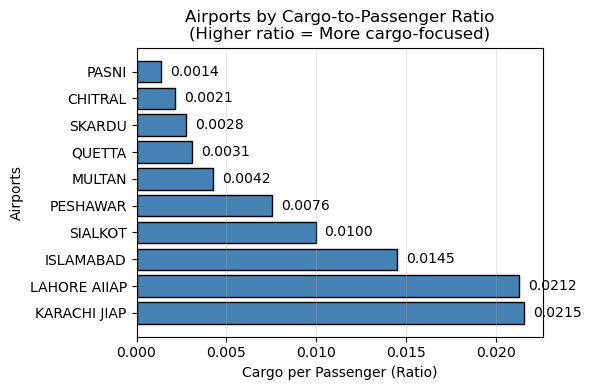

In [676]:
plt.figure(figsize=(6, 4))
top_cargo_airports = cargo_focused.head(10)

plt.barh(top_cargo_airports.index, top_cargo_airports['cargo_passenger_ratio'], 
         color='steelblue', edgecolor='black')
plt.title('Airports by Cargo-to-Passenger Ratio\n(Higher ratio = More cargo-focused)', fontsize=12)
plt.xlabel('Cargo per Passenger (Ratio)')
plt.ylabel('Airports')
plt.grid(axis='x', alpha=0.3)
# Add ratio values on bars
for i, (airport, ratio) in enumerate(zip(top_cargo_airports.index, top_cargo_airports['cargo_passenger_ratio'])):
    plt.text(ratio + 0.0005, i, f'{ratio:.4f}', va='center')
plt.tight_layout()
plt.show()

**Pakistan's aviation cargo strategy is working well at major hubs, with Karachi leading as the country's primary cargo gateway. However, there's untapped potential to develop specialized cargo operations at strategically located smaller airports.
Recommendation: Invest in cargo infrastructure at the top 3 airports while exploring niche cargo opportunities at industrial centers like Sialkot.**

In [678]:
#Compare cargo_loaded vs cargo_unloaded
#Is Pakistan importing or exporting more goods by air?
total_loaded = airline['CARGO_LOADED'].sum()
total_unloaded = airline['CARGO_UNLOADED'].sum()

print(f"Total Cargo Loaded (Exports): {total_loaded:,}")
print(f"Total Cargo Unloaded (Imports): {total_unloaded:,}")
print(f"Pakistan's Trade Balance: {'Export-focused' if total_loaded > total_unloaded else 'Import-focused'}")
print(f"Load/Unload Ratio: {total_loaded/total_unloaded:.2f}")

Total Cargo Loaded (Exports): 3,660,627.0
Total Cargo Unloaded (Imports): 1,612,490.0
Pakistan's Trade Balance: Export-focused
Load/Unload Ratio: 2.27


**Pakistan's aviation sector successfully supports a strong export-oriented economy, but there may be opportunities to balance this with increased import activities to support domestic consumption and industrial inputs.
Bottom Line: Pakistan is effectively using air transport to compete globally, with exports dominating the air cargo market by more than 2:1.**

In [680]:
#Track mail volumes over years
mail_trends = airline.groupby('YEAR')[['MAIL_LOADED','MAIL_UNLOADED']].sum()
mail_trends['TOTAL_MAIL'] = mail_trends['MAIL_LOADED'] + mail_trends['MAIL_UNLOADED']
mail_trends['YoY_Change_%'] = mail_trends['TOTAL_MAIL'].pct_change() * 100

print("Mail Volume Trends Over Years:")
print("="*50)
print(mail_trends)

# Overall trend analysis
first_year = mail_trends['TOTAL_MAIL'].iloc[0]
last_year = mail_trends['TOTAL_MAIL'].iloc[-1]
overall_change = ((last_year - first_year) / first_year) * 100

print(f"\nOverall Mail Volume Change: {overall_change:.1f}%")
print(f"Average Annual Change: {mail_trends['YoY_Change_%'].mean():.1f}%")

Mail Volume Trends Over Years:
           MAIL_LOADED  MAIL_UNLOADED  TOTAL_MAIL  YoY_Change_%
YEAR                                                           
2006-2007       2385.0         2740.0      5125.0           NaN
2007-2008       2396.0         2912.0      5308.0      3.570732
2008-2009       1798.0         2150.0      3948.0    -25.621703
2009-2010       2503.0         2710.0      5213.0     32.041540
2010-2011       2047.0         2354.0      4401.0    -15.576444
2011-2012       2183.0         2465.0      4648.0      5.612361
2012-2013       1753.0         1827.0      3580.0    -22.977625
2013-2014       1914.0         2033.0      3947.0     10.251397
2014-2015        837.0         2610.0      3447.0    -12.667849
2015-2016        666.0        13214.0     13880.0    302.668988
2016-2017        679.0        13723.0     14402.0      3.760807
2017-2018        891.0        12046.0     12937.0    -10.172198
2018-2019       3283.0        21008.0     24291.0     87.763778
2019-2020

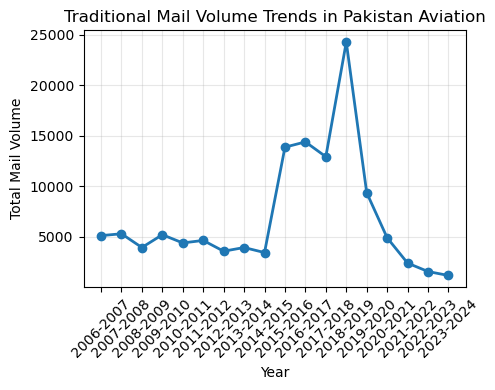

In [681]:
plt.figure(figsize=(5,4))
plt.plot(mail_trends.index, mail_trends['TOTAL_MAIL'], marker='o', linewidth=2)
plt.title('Traditional Mail Volume Trends in Pakistan Aviation')
plt.xlabel('Year')
plt.ylabel('Total Mail Volume')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Traditional mail is clearly declining due to digital communication, with the trend accelerating significantly in recent years. This represents both a challenge for traditional postal services and an opportunity for airlines to optimize their operations.**
**Recommendation:**
                Airlines should phase down mail infrastructure investment and redirect resources toward growing cargo and passenger segments, while                      potentially exploring e-commerce logistics partnerships.

In [683]:
#Compare commercial vs non-commercial aircraft usage
#Track aircraft_total trends
airport = pd.read_sql('SELECT * FROM `airport traffic flow`',con)
airport.columns

Index(['Column1', 'AIRPORT', 'AIRCRAFT_COMM_DOM', 'AIRCRAFT_COMM_INTL',
       'AIRCRAFT_COMM_TOTAL', 'AIRCRAFT_NONCOMM', 'AIRCRAFT_GRAND TOTAL',
       'PASSENGER_Domestic', 'PASSENGER_International', 'PASSENGER_total',
       'CARGO_Domestic', 'CARGO_International', 'CARGO_Total', 'MAIL_Domestic',
       'MAIL_International', 'MAIL_TOTAL'],
      dtype='object')

In [684]:
result = airport.groupby('Column1')[['AIRCRAFT_COMM_TOTAL','AIRCRAFT_NONCOMM']].sum()
result['Total'] = result['AIRCRAFT_COMM_TOTAL'] + result['AIRCRAFT_NONCOMM']
result['Commercial_Percentage'] = (result['AIRCRAFT_COMM_TOTAL'] / result['Total']) * 100
result['NonCommercial_Percentage'] = (result['AIRCRAFT_NONCOMM'] / result['Total']) * 100

In [685]:
result

,AIRCRAFT_COMM_TOTAL,AIRCRAFT_NONCOMM,Total,Commercial_Percentage,NonCommercial_Percentage
Column1,,,,,
2006-2007,128267,68896,197163,65.056324,34.943676
2007-2008,124913,68643,193556,64.535845,35.464155
2008-2009,124043,72797,196840,63.017171,36.982829
2009-2010,124767,61065,185832,67.139675,32.860325
2010-2011,133375,64013,197388,67.569964,32.430036
2011-2012,133317,91821,225138,59.215681,40.784319
2012-2013,124917,98614,223531,55.883524,44.116476
2013-2014,130095,58387,188482,69.022506,30.977494
2014-2015,127634,55461,183095,69.709167,30.290833


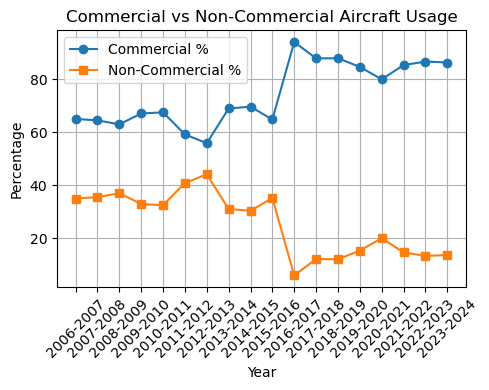

           AIRCRAFT_COMM_TOTAL  AIRCRAFT_NONCOMM   Total  \
Column1                                                    
2006-2007               128267             68896  197163   
2007-2008               124913             68643  193556   
2008-2009               124043             72797  196840   
2009-2010               124767             61065  185832   
2010-2011               133375             64013  197388   
2011-2012               133317             91821  225138   
2012-2013               124917             98614  223531   
2013-2014               130095             58387  188482   
2014-2015               127634             55461  183095   
2015-2016               154168             83508  237676   
2016-2017               164942             10177  175119   
2017-2018               162550             22227  184777   
2018-2019               137640             18684  156324   
2019-2020               104599             18788  123387   
2020-2021                86247          

In [686]:
plt.figure(figsize=(5, 4))
plt.plot(result.index, result['Commercial_Percentage'], label='Commercial %', marker='o')
plt.plot(result.index, result['NonCommercial_Percentage'], label='Non-Commercial %', marker='s')

plt.title('Commercial vs Non-Commercial Aircraft Usage')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the data
print(result)

In [687]:
# Find airports with highest total aircraft movements
airport_totals = airport.groupby('AIRPORT')['AIRCRAFT_GRAND TOTAL'].sum().sort_values(ascending=False)

# Top 10 busiest airports (likely near capacity)
top_airports = airport_totals.head(10)
print("Top 10 Busiest Airports:")
print(top_airports)

Top 10 Busiest Airports:
AIRPORT
KARACHI JIAP    883516
ISLAMABAD       639018
LAHORE AIIAP    559302
MULTAN          298968
WALTON          227463
PESHAWAR        169209
SIALKOT          70758
FAISALABAD       63357
QUETTA           59542
SUKKUR           38378
Name: AIRCRAFT_GRAND TOTAL, dtype: int64


In [688]:
# Calculate year-over-year growth for each airport
airport_yearly = airport.groupby(['Column1','AIRPORT'])['AIRCRAFT_GRAND TOTAL'].sum().reset_index()

# Calculate growth rates
airport_yearly['Growth_Rate'] = airport_yearly.groupby('AIRPORT')['AIRCRAFT_GRAND TOTAL'].pct_change() * 100
airport_yearly

,Column1,AIRPORT,AIRCRAFT_GRAND TOTAL,Growth_Rate
0,2006-2007,BAHAWALPUR,1709,NaN
1,2006-2007,BANNU,16,NaN
2,2006-2007,CHITRAL,900,NaN
3,2006-2007,D.G KHAN,620,NaN
4,2006-2007,D.I.KHAN,20,NaN
...,...,...,...,...
593,2023-2024,SKARDU,1054,29.484029
594,2023-2024,SUI,90,104.545455
595,2023-2024,SUKKUR,1121,-16.467958
596,2023-2024,TURBAT,364,-42.946708


In [689]:
# Airports with declining or very low growth (capacity constraints)
recent_growth = airport_yearly[airport_yearly['Column1'].isin(['2022-2023', '2023-2024'])]
recent_growth

,Column1,AIRPORT,AIRCRAFT_GRAND TOTAL,Growth_Rate
527,2022-2023,BADIN AIRSTRIP,4,0.000000
528,2022-2023,BAHAWALPUR,228,6.542056
529,2022-2023,CHITRAL,72,-30.769231
530,2022-2023,D.G KHAN,16,-11.111111
531,2022-2023,D.I.KHAN,1,-50.000000
...,...,...,...,...
593,2023-2024,SKARDU,1054,29.484029
594,2023-2024,SUI,90,104.545455
595,2023-2024,SUKKUR,1121,-16.467958
596,2023-2024,TURBAT,364,-42.946708


In [690]:
# Airports with declining or very low growth (capacity constraints)
low_growth_airports = recent_growth[recent_growth['Growth_Rate'] < 2]['AIRPORT'].unique()
low_growth_airports

array(['BADIN AIRSTRIP', 'CHITRAL', 'D.G KHAN', 'D.I.KHAN', 'GILGIT',
       'GWADAR', 'JACOBABAD', 'MOHENJODARO', 'NAWABSHAH ', 'QUETTA',
       'SKARDU ', 'SUI', 'TURBAT', 'BAHAWALPUR', 'DALBANDIN',
       'FAISALABAD', 'HYDERABAD', 'ORMARA ', 'PANJGUR ', 'PASNI',
       'PESHAWAR', 'R.Y. KHAN ', 'RAWALAKOT ', 'SEHWAN SHARIF ', 'SUKKUR',
       'ZHOB '], dtype=object)

In [691]:
# Airports with high international passenger traffic are likely hubs
international_hubs = airport.groupby('AIRPORT')['PASSENGER_International'].sum().sort_values(ascending=False)

# Top airports by international passengers
top_international = international_hubs.head(10)
print("Top International Passenger Airports (Connection Points):")
print(top_international)

Top International Passenger Airports (Connection Points):
AIRPORT
KARACHI JIAP    58534580
LAHORE AIIAP    51788607
ISLAMABAD       51697407
PESHAWAR        18120757
MULTAN           8860250
SIALKOT          8027046
FAISALABAD       3095339
QUETTA           1032617
TURBAT            230172
RAHIM YAR          67652
Name: PASSENGER_International, dtype: int64


In [692]:
#airports with highest international activity
connection_airports = airport.groupby('AIRPORT').agg({
    'AIRCRAFT_COMM_INTL': 'sum',
    'PASSENGER_International': 'sum'
}).reset_index()

# Sort by international passengers (main indicator of connection hub)
connection_airports = connection_airports.sort_values('PASSENGER_International', ascending=False)

print("Pakistani Connection Point Airports (by International Passengers):")
print(connection_airports.head(10))

Pakistani Connection Point Airports (by International Passengers):
         AIRPORT  AIRCRAFT_COMM_INTL  PASSENGER_International
20  KARACHI JIAP              378412                 58534580
22  LAHORE AIIAP              286864                 51788607
14     ISLAMABAD              274260                 51697407
37      PESHAWAR              119348                 18120757
25        MULTAN               56820                  8860250
49       SIALKOT               55976                  8027046
10    FAISALABAD               25349                  3095339
38        QUETTA                9036                  1032617
54        TURBAT                5964                   230172
40     RAHIM YAR                 576                    67652
